In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Importing the Dataset

In [21]:
df=pd.read_csv("Hr.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


There are total 1470 rows and 35 columns.
As we have to find the attrition rate i.e employee stay with company or leave the company.
This is a classification problem.
Information regarding number of employee, educational backround of employees and the time they have spend in the company and various other parameters.

In [22]:
df.shape

(1470, 35)

In [23]:
df.columns  #names of columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [25]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As we can see that there are no null values in the columns.

# Univariant, Bivariant, Multivariant Analysis

<AxesSubplot:xlabel='Attrition', ylabel='count'>

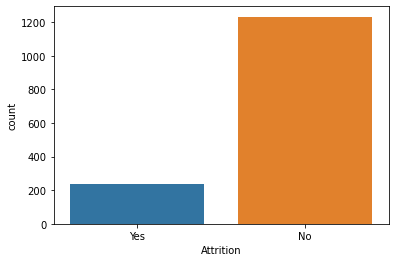

In [26]:
sns.countplot(df["Attrition"])

If the Attrition is NO i.e people will stay with the company which is a very profitable situation for a company.
If the Attrition rate is YES i.e people will leave the company i.e attrition is high.....for which company has to bear high cost i.e company has to spend lot on employee training, more on paper work, more hardwork on searching good employee for the company.

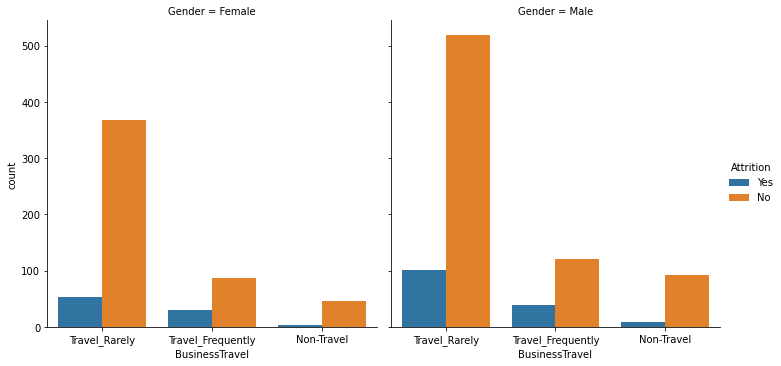

In [27]:
sns.catplot(x='BusinessTravel',col='Gender',hue='Attrition',data=df, kind='count')

People who travel rarely have less attrition rate. i.e they prefer to stay with the company.

<AxesSubplot:xlabel='Gender', ylabel='count'>

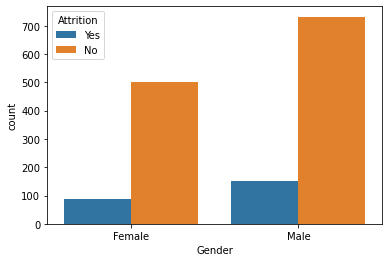

In [28]:
sns.countplot(x="Gender",hue="Attrition",data=df)

Attrition rate in both the case for males is more.

<AxesSubplot:xlabel='Department', ylabel='count'>

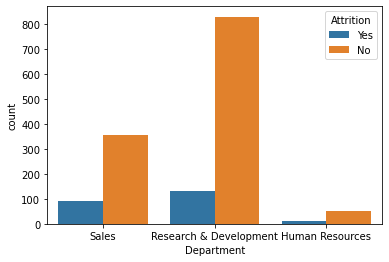

In [29]:
sns.countplot(x="Department",hue="Attrition",data=df)

Research and development people usually stay with the company i.e they are retained in the same company.

<AxesSubplot:xlabel='JobRole', ylabel='count'>

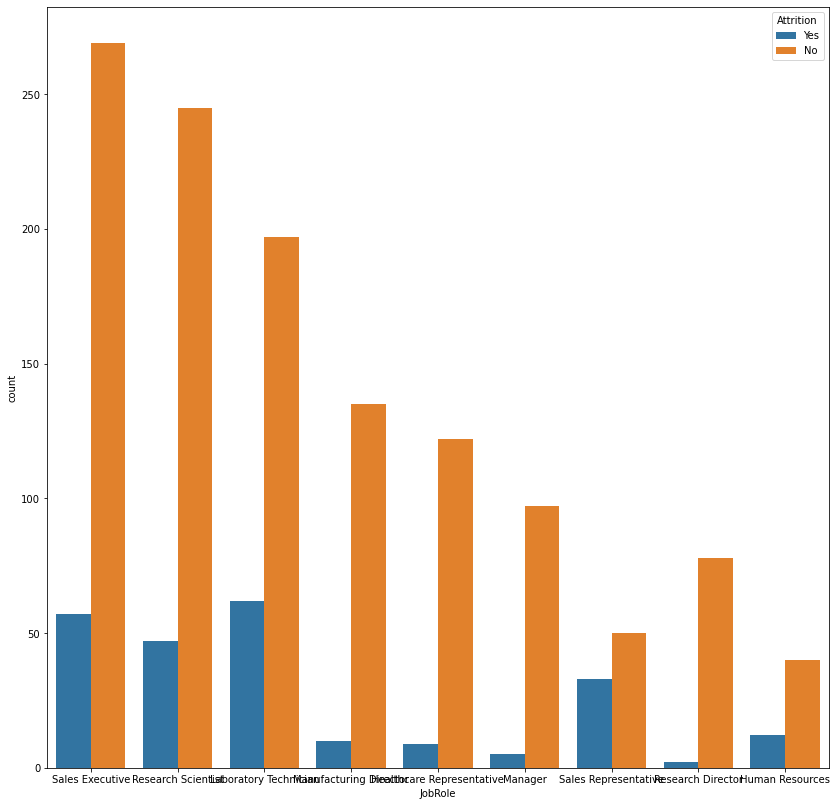

In [30]:
mplt.figure(figsize=(14,14))
sns.countplot(x="JobRole",hue="Attrition",data=df)

People working as sales executive usually stay with the company i.e no attrition rate.
People working as Laboratory Technician have high attrition rate.

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

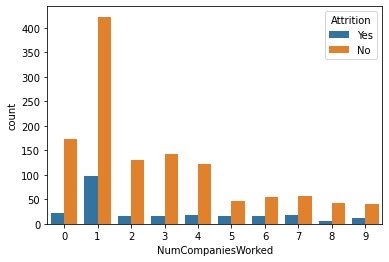

In [31]:
sns.countplot(x="NumCompaniesWorked",hue="Attrition",data=df)

People who has worked in 1 or less company have low attrition rate i.e they prefer not to switch there company.

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

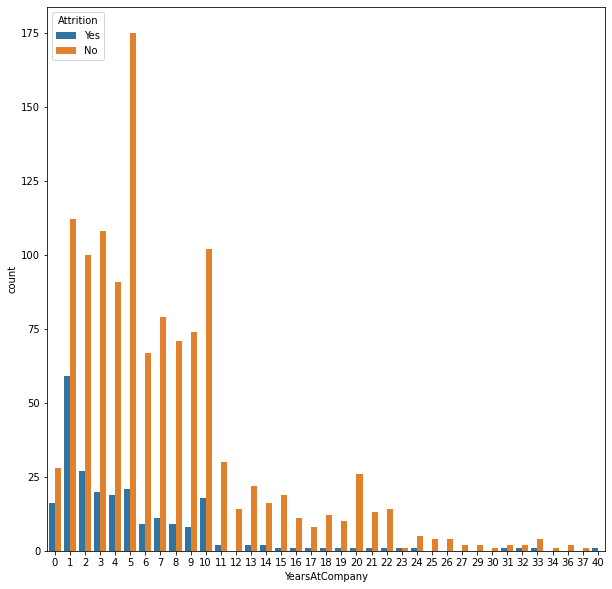

In [32]:
mplt.figure(figsize=(10,10))
sns.countplot(x="YearsAtCompany",hue="Attrition",data=df)

people with 5 years of an experinece in a company usually stay i.e no attrition people with 1 year of experience usually leave.

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

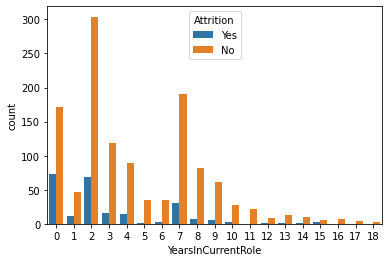

In [33]:
sns.countplot(x="YearsInCurrentRole",hue="Attrition",data=df)

People who spend around 2 years in the current job role usually stay in a company and people with less than 1 year of experience usually leave the company.

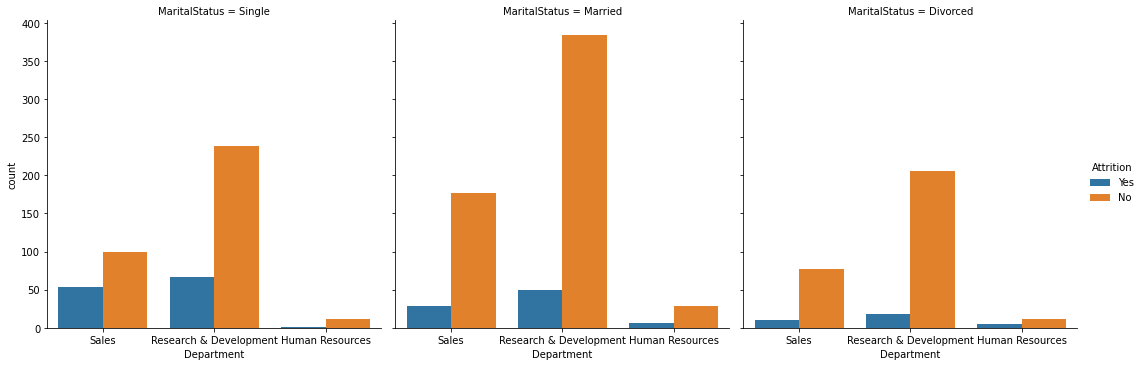

In [34]:
sns.catplot(x='Department',col='MaritalStatus',hue='Attrition',data=df, kind='count')

From above plot i can say that, thoes who are married and are working in research and development department have very less attrition rate i.e they preffer to retain with the company.....less likely to chnage there company.

<AxesSubplot:>

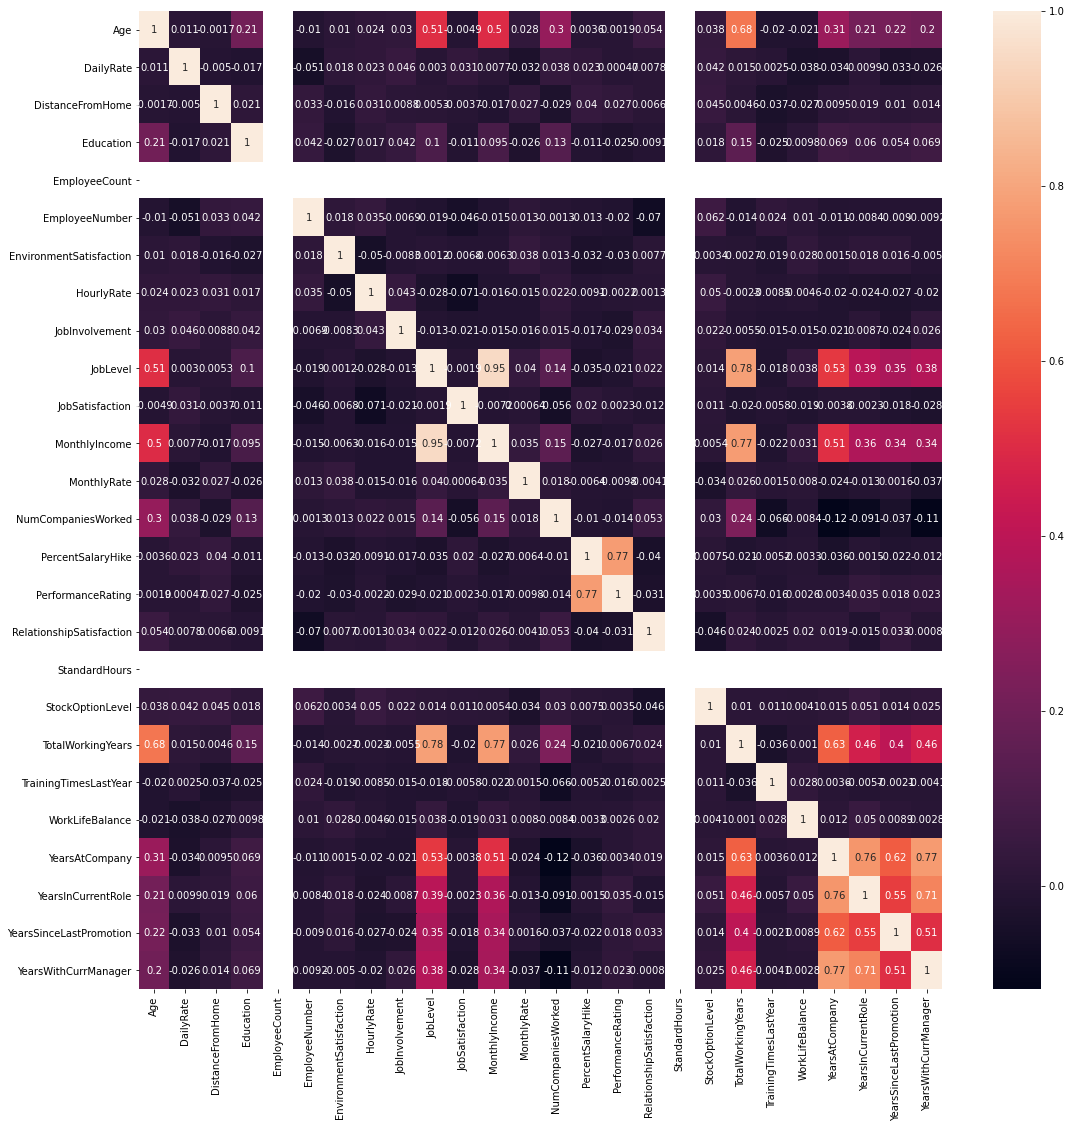

In [35]:
mplt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)

In the above Heatmap, we can see that:
1:PercentSalaryhike and performance rating are postively correlated we can say that......with the good perfromance rating salary hike will be good.
2.job level and total working years are positively corelated i.e higher the job level higher will be the total working years.
3.Monthly income and Total working years are positively corelated i.e more working years more will be the income.
4.Total working years and age are positive i.e more working years more will be the age.
5.Higher the job level higher the total working years.
6.More the age higher will be the job level and higher will be the monthly income.
7.Years at company and years in current role are also positively corelated.

Age                            AxesSubplot(0.125,0.772143;0.0824468x0.107857)
DailyRate                   AxesSubplot(0.223936,0.772143;0.0824468x0.107857)
DistanceFromHome            AxesSubplot(0.322872,0.772143;0.0824468x0.107857)
Education                   AxesSubplot(0.421809,0.772143;0.0824468x0.107857)
EmployeeCount               AxesSubplot(0.520745,0.772143;0.0824468x0.107857)
EmployeeNumber              AxesSubplot(0.619681,0.772143;0.0824468x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.718617,0.772143;0.0824468x0.107857)
HourlyRate                  AxesSubplot(0.817553,0.772143;0.0824468x0.107857)
JobInvolvement                 AxesSubplot(0.125,0.642714;0.0824468x0.107857)
JobLevel                    AxesSubplot(0.223936,0.642714;0.0824468x0.107857)
JobSatisfaction             AxesSubplot(0.322872,0.642714;0.0824468x0.107857)
MonthlyIncome               AxesSubplot(0.421809,0.642714;0.0824468x0.107857)
MonthlyRate                 AxesSubplot(0.520745,0.642714;0.0824

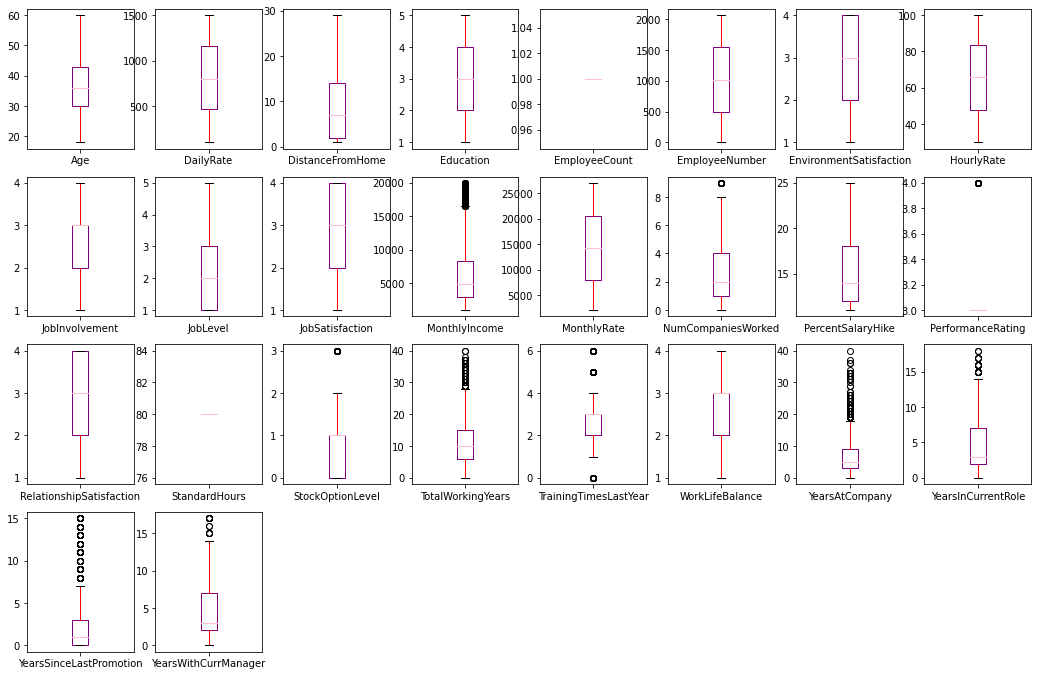

In [36]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(6,8),figsize=(18,18),color=color)

We can observe the presence of outliers in the above dataset.

# Data Cleaning/Preprocessing

In [37]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From above we can observe that,
Minimum age is 18 and maximum age is 60.
employee count is 1
mean in some cases is less than 50% which shows skewness is there.


In [38]:
for i in df.columns:
    if df[i].dtypes== object:
        print(df[i].value_counts())
        print("----------")
    else:
        pass

No     1233
Yes     237
Name: Attrition, dtype: int64
----------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------
Male      882
Female    588
Name: Gender, dtype: int64
----------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
----------
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
-----

Counting the values for each object type column.

# Feature Engineering

In [39]:
df.drop('Over18', axis=1, inplace=True)

In [40]:
df.drop(['EmployeeNumber','StandardHours','EmployeeCount'], axis=1,inplace=True)

As we could observe from our dataset that over18, employeenumber,standard hours and employee count have same number i.e single value for each row....which is giving us no info. we can remover thoes columns.
Beacause we have perfromed feature engineering here will not be going for VIF Factor as deleting furthur columns may loose important information.

In [41]:
df.shape

(1470, 31)

# Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

for i in df.columns:
    if df[i].dtype== np.number:
        continue
    else:
        df[i]=LabelEncoder().fit_transform(df[i])

In [43]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2


As some of the columns like Attrition, Job role, marital status, Business Travle were in categorial type so we need to covert them into numeric type.

# Skewness and Outliers

In [44]:
df.skew() #checking the skewness amoung the data

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.112899
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [45]:
zp=np.abs(zscore(df))   #removing outliers present the dataset
zp
threshold=3
print(np.where(zp>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [46]:
df_new=df[(zp<3).all(axis=1)]
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


In [47]:
df_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.012403
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.112326
MonthlyRate                 0.024344
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

Skewness is still present in the dataset.

# Dividing dataset into X(Independent) and Y(Dependent) variable

In [48]:
x=df_new.drop("Attrition",axis=1)  #Independent Variable
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,1,0,64,...,0,0,0,8,0,0,6,4,0,5
1,31,1,113,1,7,0,1,2,1,31,...,1,3,1,10,3,2,10,7,1,7
2,19,2,805,1,1,1,4,3,1,62,...,0,1,0,7,3,2,0,0,0,0
3,15,1,820,1,2,3,1,3,0,26,...,0,2,0,8,3,2,8,7,3,0
4,9,2,312,1,1,0,3,0,1,10,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,1,494,1,22,1,3,2,1,11,...,0,2,1,17,3,2,5,2,0,3
1466,21,2,327,1,5,0,3,3,1,12,...,0,0,1,9,5,2,7,7,1,7
1467,9,2,39,1,3,2,1,1,1,57,...,1,1,1,6,0,2,6,2,0,3
1468,31,1,579,2,1,2,3,3,1,33,...,0,3,0,17,3,1,9,6,0,8


In [49]:
y=df_new['Attrition']  #Dependent Variable.
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

# Removing Skewness and Performing Scaling

In [50]:
from sklearn.preprocessing import power_transform,MinMaxScaler
x=power_transform(x,method='yeo-johnson')
x


array([[ 0.59475711,  0.63872976,  0.72632912, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.36633824, -1.38077628, -1.34801814, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.1727712 ,  0.63872976,  1.32006836, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.05707145,  0.63872976, -1.79991586, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.36633824, -1.38077628,  0.57176248, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16498893,  0.63872976, -0.33110751, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

As we have observed that the skewness is peresent in the data...even after removing outliers so we will do power transformation called Yeo-Johnson method.

In [51]:
mn=MinMaxScaler()
x=mn.fit_transform(x)
x

array([[0.66278521, 1.        , 0.77485467, ..., 0.48802844, 0.        ,
        0.58377965],
       [0.8138674 , 0.18602295, 0.2196299 , ..., 0.67567065, 0.43975871,
        0.70434594],
       [0.58015675, 1.        , 0.93377634, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33934302, 1.        , 0.09867387, ..., 0.30949453, 0.        ,
        0.42791985],
       [0.8138674 , 0.18602295, 0.73348299, ..., 0.61990306, 0.        ,
        0.75626502],
       [0.51402042, 1.        , 0.49181864, ..., 0.40698574, 0.43975871,
        0.32653424]])

As the columns ahve different scales we need to put up Min Max Scaling to bring them on same scale.

# SMOTE

In [52]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()      #SMOTE to balance the target variable.
x_res,y_res=smt.fit_resample(x,y)

In [53]:
y_res.value_counts()

0    1158
1    1158
Name: Attrition, dtype: int64

As we have observed that the Attrition is our Dependent variable and is divided into 2 categoris i.e Yes and No and the counts of each has huge difference so to cover that we will use over sampling technique called SMOTE.

# Performing Algorithms

In [54]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("Best accuracy is",round(maxacc,2),"at random state",maxrs)

Best accuracy is 0.84 at random state 75


In [55]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,test_size=.30,random_state=75)

# Logistic Regression

In [56]:
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
ac=accuracy_score(y_test1,pred)
print("accuracy score",ac)
clas=classification_report(y_test1,pred)
print(clas)

accuracy score 0.8388489208633093
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       345
           1       0.85      0.82      0.84       350

    accuracy                           0.84       695
   macro avg       0.84      0.84      0.84       695
weighted avg       0.84      0.84      0.84       695



# Support Vector Classifier

In [57]:
ker=["rbf","poly","linear"]
for i in ker:
    svc=SVC(kernel=i)
    svc.fit(x_train1,y_train1)
    pred=svc.predict(x_test1)
    print(i,accuracy_score(y_test1,pred))
    print(i,classification_report(y_test1,pred))

rbf 0.9194244604316547
rbf               precision    recall  f1-score   support

           0       0.92      0.92      0.92       345
           1       0.92      0.92      0.92       350

    accuracy                           0.92       695
   macro avg       0.92      0.92      0.92       695
weighted avg       0.92      0.92      0.92       695

poly 0.9223021582733812
poly               precision    recall  f1-score   support

           0       0.96      0.88      0.92       345
           1       0.89      0.96      0.93       350

    accuracy                           0.92       695
   macro avg       0.92      0.92      0.92       695
weighted avg       0.92      0.92      0.92       695

linear 0.8474820143884892
linear               precision    recall  f1-score   support

           0       0.83      0.86      0.85       345
           1       0.86      0.83      0.85       350

    accuracy                           0.85       695
   macro avg       0.85      0.85      

In [58]:
svc1=SVC(kernel="poly",probability=True)
svc1.fit(x_train1,y_train1)
pred=svc1.predict(x_test1)
print("Accuracy score",accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

Accuracy score 0.9223021582733812
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       345
           1       0.89      0.96      0.93       350

    accuracy                           0.92       695
   macro avg       0.92      0.92      0.92       695
weighted avg       0.92      0.92      0.92       695



# Multinomial Classifier

In [59]:
mnb=MultinomialNB()
mnb.fit(x_train1,y_train1)
pred=mnb.predict(x_test1)
print("Accuracy score",accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

Accuracy score 0.7884892086330936
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       345
           1       0.80      0.78      0.79       350

    accuracy                           0.79       695
   macro avg       0.79      0.79      0.79       695
weighted avg       0.79      0.79      0.79       695



# Decision Tree Classifier

In [60]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.8517985611510791
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       345
           1       0.85      0.86      0.85       350

    accuracy                           0.85       695
   macro avg       0.85      0.85      0.85       695
weighted avg       0.85      0.85      0.85       695



# Random Forest Classifier

In [61]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)


accuracy score 0.9251798561151079
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       345
           1       0.96      0.89      0.92       350

    accuracy                           0.93       695
   macro avg       0.93      0.93      0.93       695
weighted avg       0.93      0.93      0.93       695



# Ada Boost Classifier

In [62]:
ad=AdaBoostClassifier()
ad.fit(x_train1,y_train1)
pred=ad.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)


accuracy score 0.9136690647482014
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       345
           1       0.94      0.89      0.91       350

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695



# CROSS VALIDATION SCORE

In [63]:
print(cross_val_score(rf,x,y,cv=5).mean())  #Random Forest Classifier

0.8536347817053217


In [64]:
print(cross_val_score(dtc,x,y,cv=5).mean()) #Decision tree Classifier

0.7793600498662442


In [65]:
print(cross_val_score(svc1,x,y,cv=5).mean()) #Support vector calssifier

0.8370724359140846


In [66]:
print(cross_val_score(mnb,x,y,cv=5).mean()) #Multinomial Classifier

0.8370620471132121


In [67]:
print(cross_val_score(ad,x,y,cv=5).mean())  #Ada Boost Classifier

0.8673402072565775


In [68]:
print(cross_val_score(lm,x,y,cv=5).mean()) #Logistic Regression

0.872391761680908


# ROC_AUC CURVE

In [69]:
y_pred_prob=ad.predict_proba(x_test1)[:,1]
y_pred_prob

array([0.54042116, 0.49640024, 0.46642811, 0.48113091, 0.49761564,
       0.48000144, 0.53581741, 0.46905238, 0.50528999, 0.49262004,
       0.47657107, 0.54216962, 0.47621118, 0.51800261, 0.50679029,
       0.5253961 , 0.51856254, 0.48119229, 0.49638291, 0.47839616,
       0.47067468, 0.4797327 , 0.52042739, 0.51410106, 0.50822472,
       0.48034504, 0.53435231, 0.49381602, 0.52567054, 0.48106799,
       0.51710778, 0.50280177, 0.50839226, 0.47140209, 0.51668227,
       0.52773007, 0.51026177, 0.49526698, 0.50002765, 0.52902885,
       0.4670497 , 0.49176367, 0.48005491, 0.50080694, 0.48889118,
       0.5364481 , 0.46910696, 0.53717372, 0.52135019, 0.52001658,
       0.50872113, 0.49709119, 0.47958298, 0.51741968, 0.49192092,
       0.48134759, 0.49876136, 0.48078802, 0.50639286, 0.53023356,
       0.52311112, 0.48568001, 0.5061894 , 0.51691981, 0.50590406,
       0.46865416, 0.49106411, 0.52611305, 0.53168936, 0.47185997,
       0.470955  , 0.51156665, 0.47441557, 0.48044272, 0.53718

In [70]:
fpr,tpr,thresholds=roc_curve(y_test1,y_pred_prob)

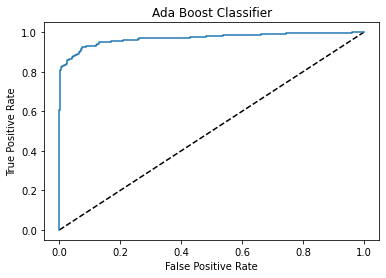

In [71]:
mplt.plot([0,1],[0,1],"k--")
mplt.plot(fpr,tpr,label="AdaBoostClassifier")
mplt.xlabel("False Positive Rate")
mplt.ylabel("True Positive Rate")
mplt.title("Ada Boost Classifier")
mplt.show()

In [72]:
auc_score=roc_auc_score(y_test1,ad.predict(x_test1))
auc_score

0.9138509316770187

auc score is almost equal to accuracy score.

# HyperParameter Tuning

In [73]:
parameter={"algorithm":['SAMME','SAMME.R'],
          "random_state":np.arange(2,20),
          "n_estimators":np.arange(2,20),
          "learning_rate":np.arange(1,10)}

In [74]:
gcv=GridSearchCV(AdaBoostClassifier(),parameter,cv=5)

In [75]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'random_state': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [76]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [77]:
gcv.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1,
 'n_estimators': 19,
 'random_state': 2}

In [78]:
ad=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=19,random_state=2)
ad.fit(x_train1,y_train1)
pred=ad.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)


accuracy score 0.883453237410072
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       345
           1       0.90      0.86      0.88       350

    accuracy                           0.88       695
   macro avg       0.88      0.88      0.88       695
weighted avg       0.88      0.88      0.88       695



# Saving Model

In [79]:
import joblib
joblib.dump(ad,"hrana.pkl")

['hrana.pkl']